# Planteamiento del problema

BoomBikes, un proveedor de sistemas de bicicletas compartidas con sede en EE. UU., aspira a comprender la demanda de bicicletas compartidas entre las personas. La empresa quiere saber
* 1. Qué variables son significativas para predecir la demanda de bicicletas compartidas
* 2. Qué tan bien describen esas variables las demandas de la bicicleta

## Paso 1: lectura y comprensión de datos

In [1]:
#importar Librerias
import numpy as np
import pandas as pd

In [2]:
#semilla
np.random.seed(1111)

In [3]:
#suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

In [4]:
#cargar los datos
bikes=pd.read_csv("../datasets/day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#describir el conjunto de datos
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#shape and basic info
print(bikes.shape)
bikes.dtypes
bikes.season.value_counts()

(730, 16)


3    188
2    184
1    180
4    178
Name: season, dtype: int64

* Según el diccionario de datos, vemos que las columnas 'temporada', 'mes', 'día de la semana', 'clima' deberían ser variables categóricas.
* Pero aquí vemos que son del tipo int64. Por lo tanto, debemos convertir estas columnas en categoría
* A partir del conjunto de datos y el enunciado del problema, podemos inferir que la variable objetivo es 'cnt'

## Paso 2: limpieza y modificación de datos

* Convierta las columnas 'season','mnth', 'weekday', 'weathersit' en categoría

In [7]:
#Convertir variables categóricas int64 en object
bikes['season']=bikes['season'].astype('category')
bikes['mnth']=bikes['mnth'].astype('category')
bikes['weekday']=bikes['weekday'].astype('category')
bikes['weathersit']=bikes['weathersit'].astype('category')

In [8]:
#Comprobar los tipos de datos
bikes.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

* BoomBikes quiere comprender los factores más importantes que impulsan la demanda de bicicletas de alquiler y crear un modelo que los rodee.
* A partir del conjunto de datos dado, encontramos que la columna 'instant' es solo una columna ordinal/índice que no explica la demanda de bicicletas. Por lo tanto, podemos descartar 'instant'
* La información proporcionada por la columna 'dteday' se ha dividido y explicado adicionalmente por otras columnas como 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday'.Por lo tanto, la columna 'dteday' es redundante y se puede descartar.
* Las funciones 'casual' y 'registered' se han resumido en la variable 'cnt', que es la variable de destino. Por lo tanto, podemos descartar 'casual' y 'registered'
* También la función 'temp' y 'atemp' proporcionan información similar sobre el mismo atributo. Por lo tanto, se elimina 'atemp'

In [9]:
#Elimar las columnas
bikes=bikes.drop(['instant','dteday','casual','registered','atemp'],axis = 1)

In [10]:
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Comprobar si faltan valores

In [11]:
# porcentaje de los valores faltantes (por columna)
round(100*(bikes.isnull().sum()/len(bikes.index)), 2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

### Reetiquetado de las columnas categóricas

Vemos que las columnas 'season', 'weekday', 'mnth' y 'weathersit' son todas columnas categóricas que tienen etiquetas numéricas.<br>Para facilitar la comprensión, volvamos a etiquetarlas según el diccionario de datos

In [12]:
#Reetiquetar columnas categóricas
cleanup_nums = {"season":{1: "spring",2:"summer",3:"fall",4:"winter"},
                 "mnth" :{1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},
                "weekday":{0:"Tues",1:"Wed",2:"Thur",3:"Fri",4:"Sat",5:"Sun",6:"Mon"},
                "weathersit":{1:"Clear",2:"Mist",3:"Light Snow", 4:"Heavy Rain"}}
bikes = bikes.replace(cleanup_nums)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Paso 3: Visualización de los datos

In [13]:
#importación de bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

### Análisis univariado

In [14]:
# Creó una función para crear gráficos de distribución univariados para variables numéricas

def generate_univariate_distplots(col):
    
    plot_1 = sns.distplot(bikes['{col}'.format(col = col)])
    
    plot_1.set(xlabel='{col}'.format(col = col), ylabel='Frequency')
    
    plot_1.set_title('{col} vs Demand'.format(col = col),fontsize =18)

    plt.show()

In [15]:
# Creé una función para crear diagramas de barras de análisis univariado

def generate_univariate_barplots(col):
    
    plot_1 = (bikes['{col}'.format(col = col)].value_counts(normalize=True)*100).plot.bar()
    
    plot_1.set(xlabel='{col}'.format(col = col), ylabel='Frequency in percentage')
    
    plot_1.set_title('{col} vs Demand in percentage'.format(col = col),fontsize =18)

    plt.show()


#### season

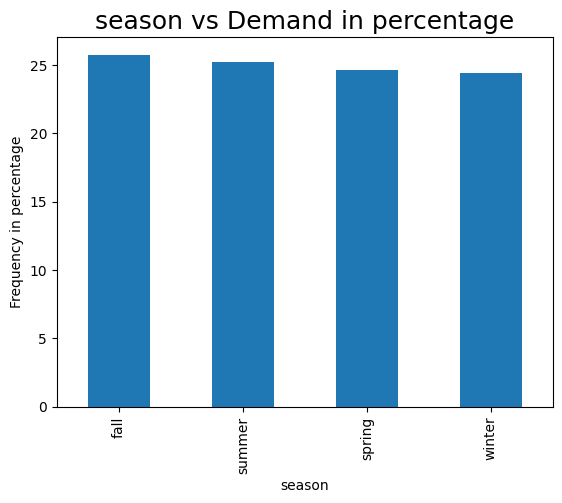

In [16]:
generate_univariate_barplots('season')

######  Insights : season : La máxima demanda de bicicletas de alquiler es en otoño seguido de verano

#### mnth

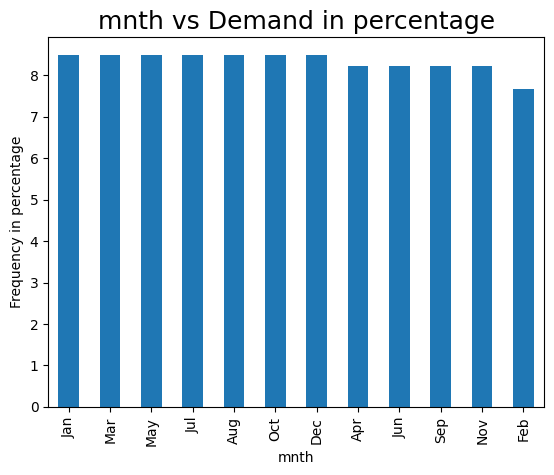

In [17]:
generate_univariate_barplots('mnth')

######  Insights : mnth : La demanda es más o menos la misma en todos los meses y es un poco baja en febrero.

#### weekday

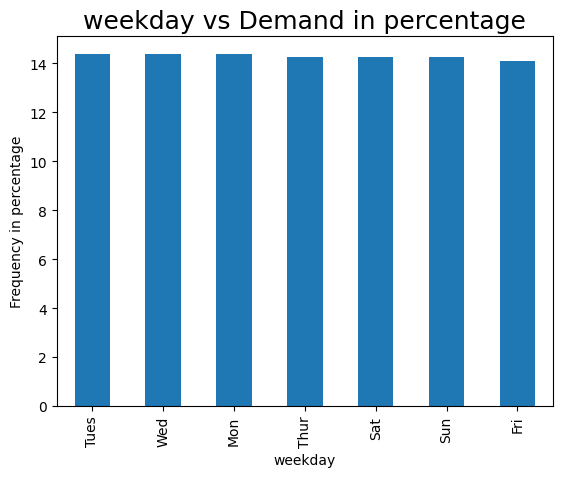

In [18]:
generate_univariate_barplots('weekday')

######  Insights : weekday : La demanda no varía significativamente entre los días de la semana.

#### weathersit

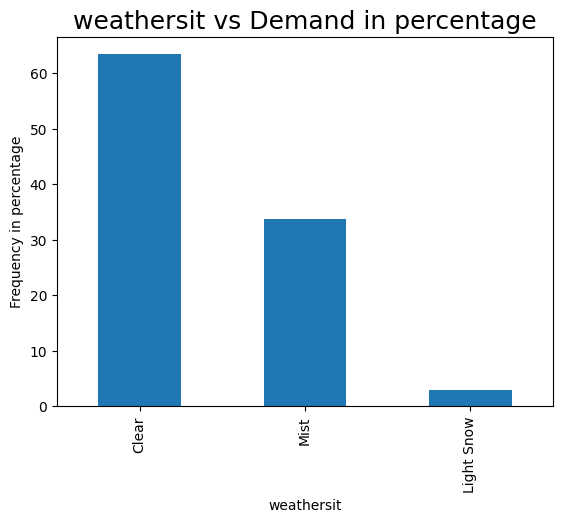

In [19]:
generate_univariate_barplots('weathersit')

######  Insights : weathersit : La demanda de bicicletas de alquiler es mayor con tiempo despejado y menor con nieve ligera

#### temp

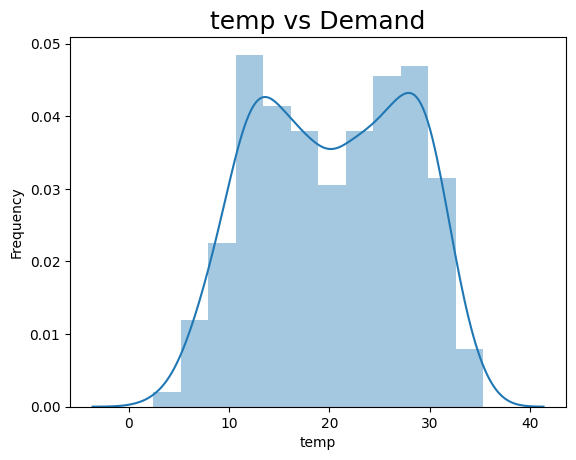

In [20]:
generate_univariate_distplots('temp')

######  Insights : temp : The demand for rental bikes is highest around 11 and 27.This indicates that only when the temp is not extreme people opt for bikes to stay outdoor

#### hum

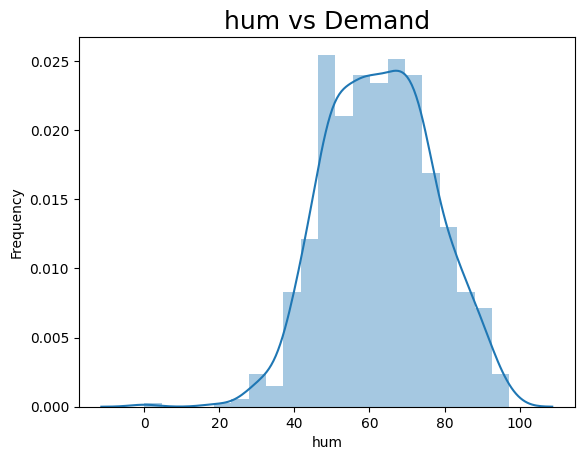

In [21]:
generate_univariate_distplots('hum')

###### Insights : hum : La demanda de bicicletas de alquiler es más alta entre el nivel de humedad de 56 a 75.

#### windspeed

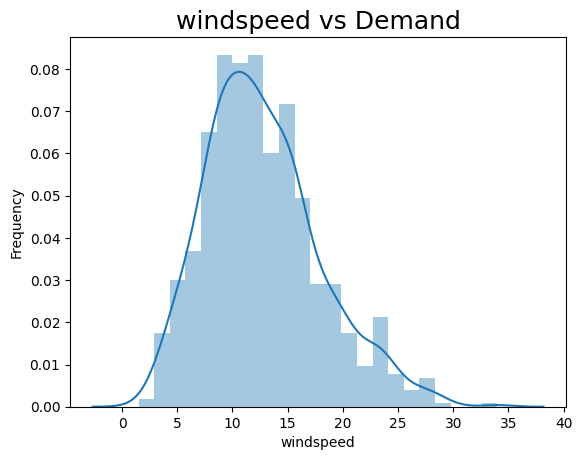

In [22]:
generate_univariate_distplots('windspeed')

###### Insights: velocidad del viento: la demanda de bicicletas de alquiler alcanza su punto máximo entre la velocidad del viento de 10 a 15

### Análisis bivariado

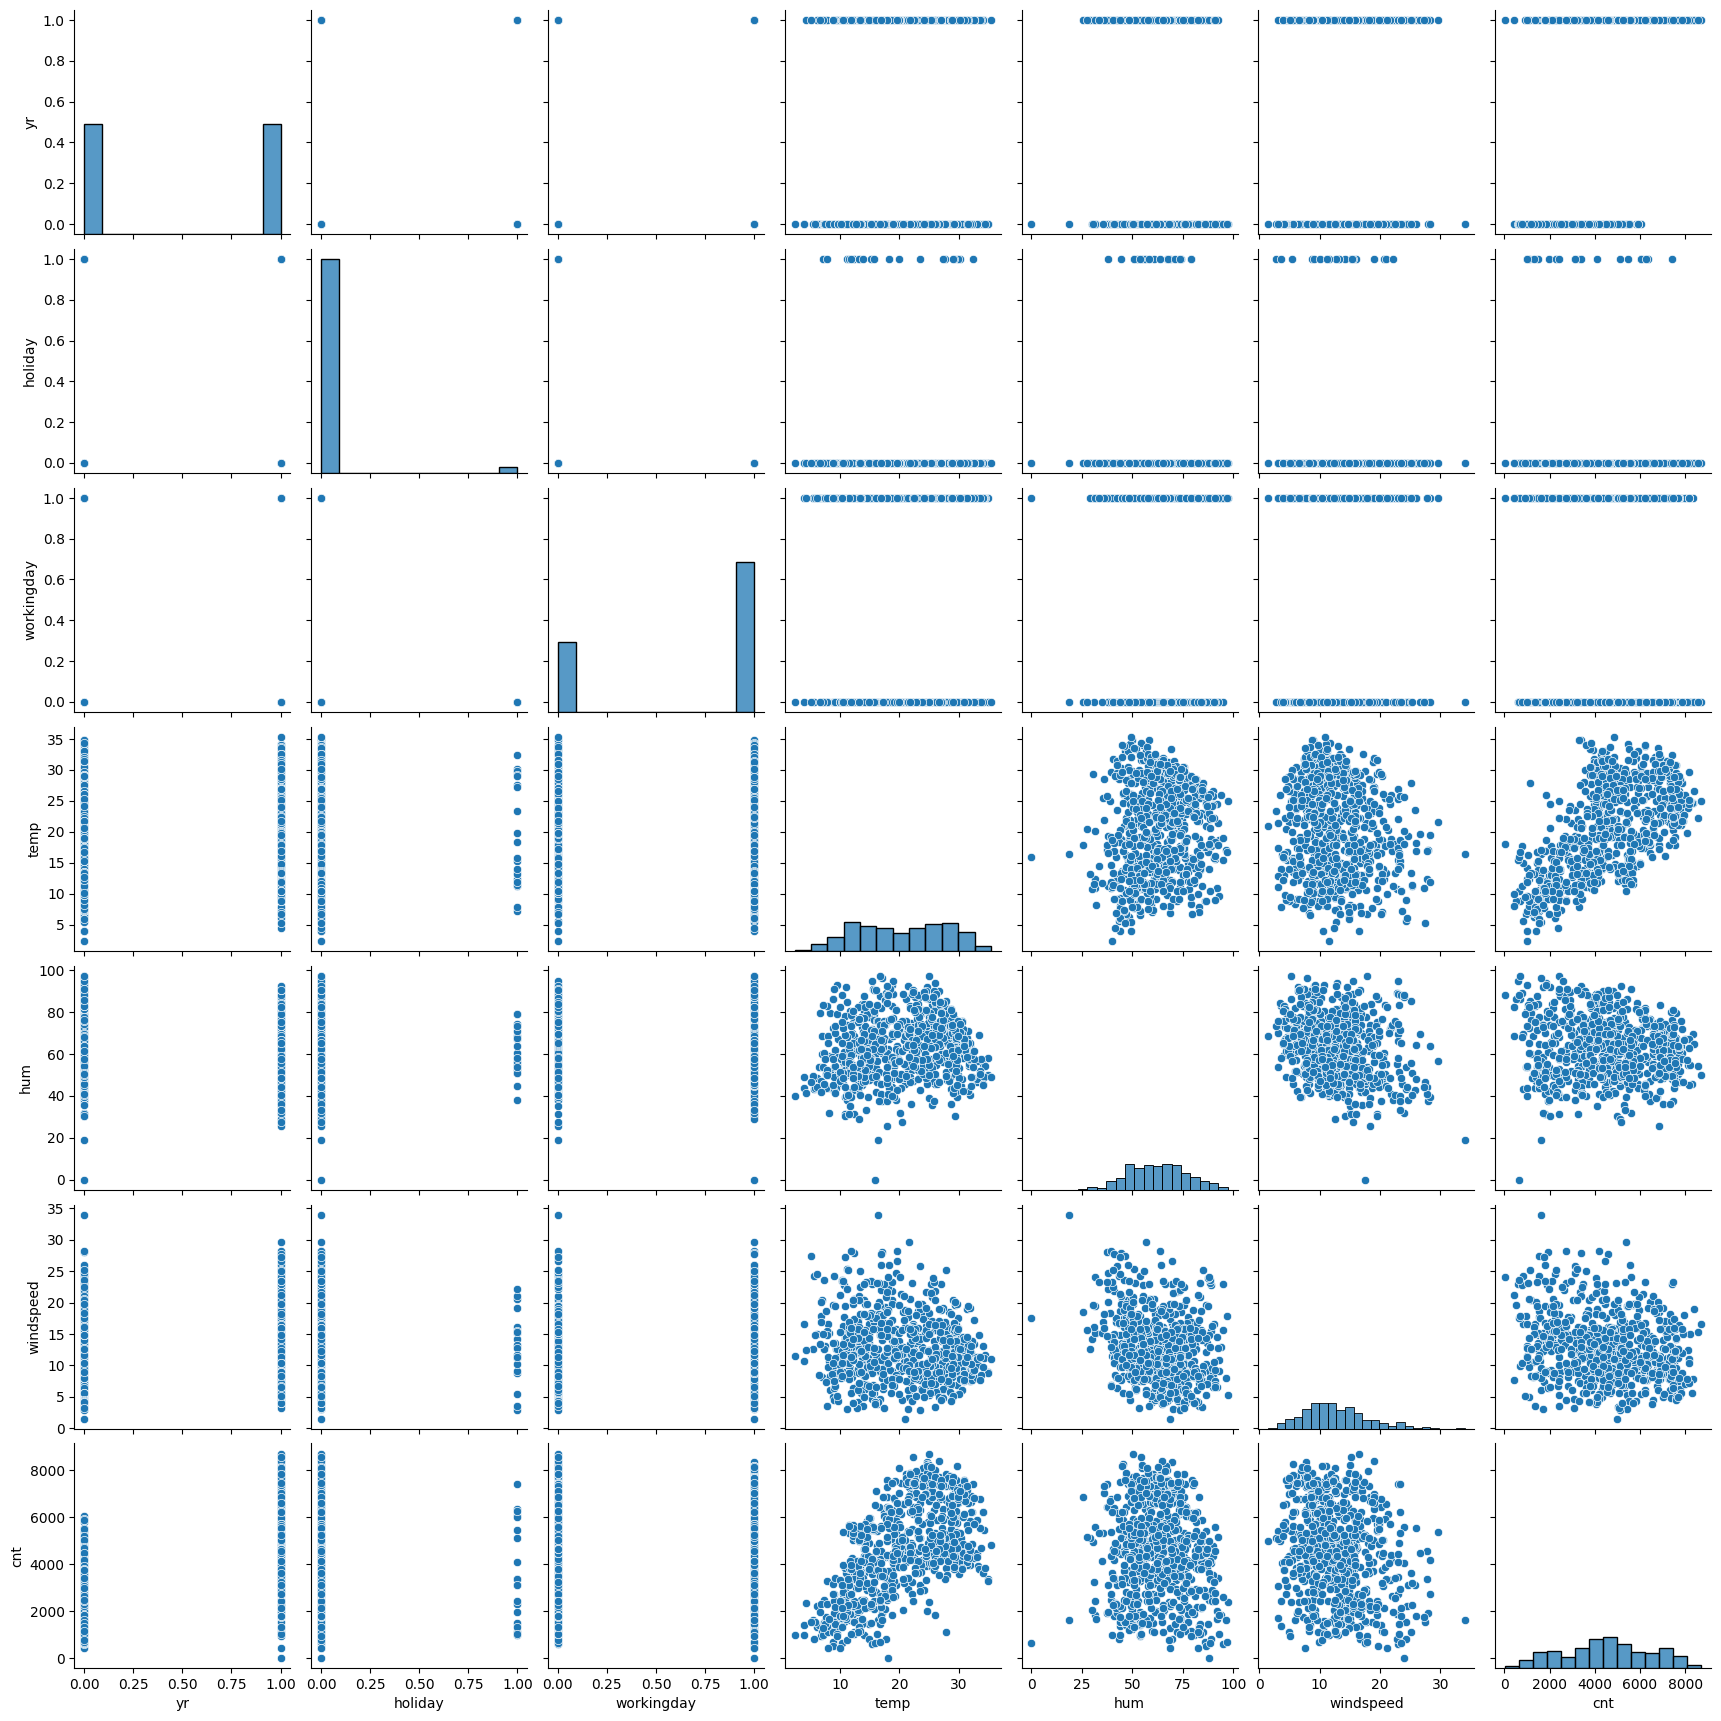

In [23]:
#pairplot de todas las variables numéricas
sns.pairplot(bikes)
plt.show()

#### Insight: Del diagrama de pares anterior podemos ver que todas las variables independientes están linealmente relacionadas con la variable objetivo dependiente 'cnt'.<br> Por lo tanto, podemos crear un modelo de regresión lineal para predecir la variable dependiente usando las variables independientes

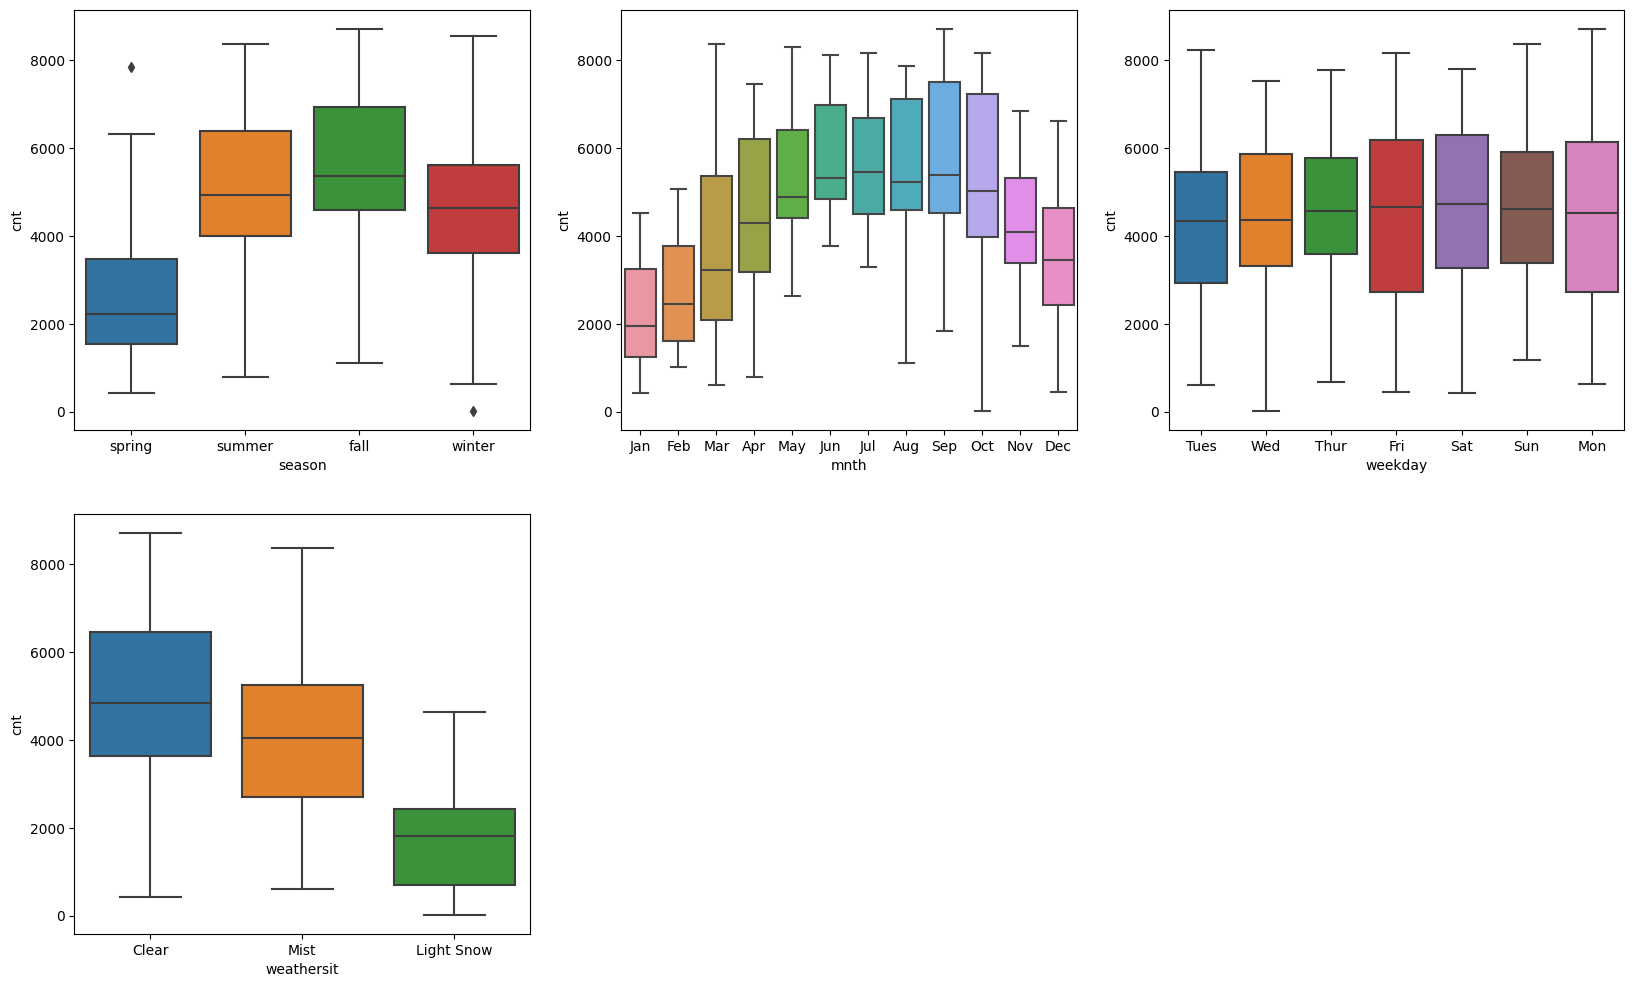

In [24]:
#Boxplot de variables categóricas
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

### Análisis bivariado segmentado

##### season,weekday vs cnt

Text(0.5, 1.0, 'season,weekday vs cnt')

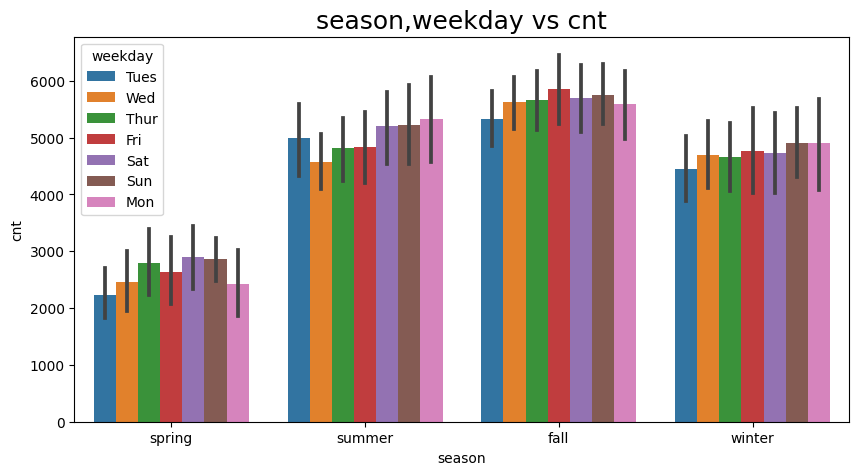

In [25]:
plt.figure(figsize=(10,5))

plot=sns.barplot(x = 'season', y = 'cnt',  hue= 'weekday',  data=bikes,  estimator=np.mean)
plot.set_title('season,weekday vs cnt',fontsize =18)


#### Insight: En el gráfico anterior, vemos que en todas las estaciones la demanda es alta los sábados y domingos y particularmente baja los martes.

##### season,weathersit vs cnt

Text(0.5, 1.0, 'season,weathersit vs cnt')

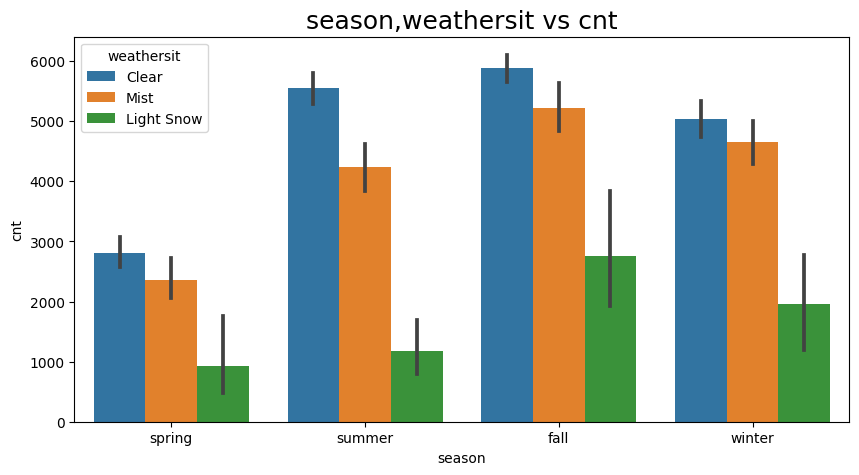

In [26]:
plt.figure(figsize=(10,5))

plot=sns.barplot(x = 'season', y = 'cnt',  hue= 'weathersit',  data=bikes,  estimator=np.mean)
plot.set_title('season,weathersit vs cnt',fontsize =18)


##### Insight: En todas las estaciones, la demanda es muy alta en tiempo despejado y particularmente baja en Light Snow.

##### month,weathersit vs cnt

Text(0.5, 1.0, 'month,weathersit vs cnt')

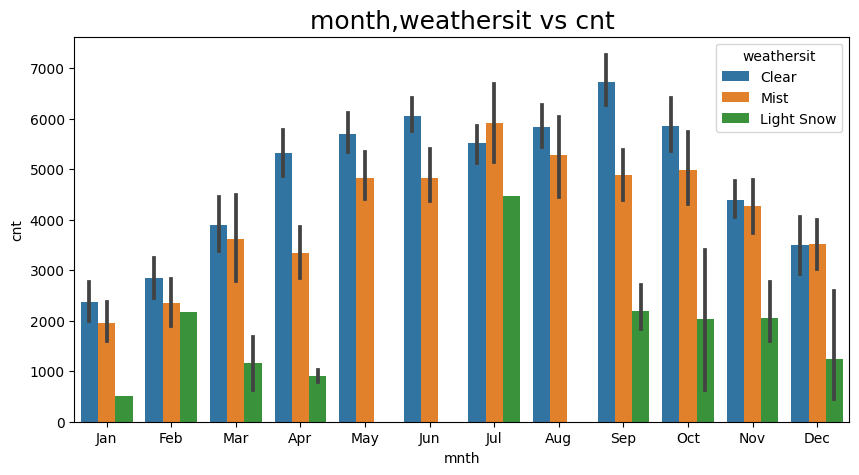

In [27]:
plt.figure(figsize=(10,5))

plot=sns.barplot(x = 'mnth', y = 'cnt',  hue= 'weathersit',  data=bikes,  estimator=np.mean)
plot.set_title('month,weathersit vs cnt',fontsize =18)


##### Insight: La demanda es más alta en tiempo despejado en el mes de septiembre

## Paso 4: Preparación de datos
* La regresión lineal no acepta valores categóricos. Por lo tanto, debemos convertir las variables categóricas en variables ficticias.

### Crear variables Dummy 

In [28]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


##### variable Dummy  de variable season 

In [29]:
season = pd.get_dummies(bikes['season'])

In [30]:
season.sample(6)

,spring,summer,fall,winter
705,0,0,0,1
341,0,0,0,1
89,0,1,0,0
266,0,0,0,1
500,0,1,0,0
479,0,1,0,0


Ahora, no necesitamos tres columnas. Podemos eliminar la columna de otoño, ya que la temporada se puede identificar solo con las últimas tres columnas donde:<br>
<br>
000 corresponderá a otoño<br>
100 corresponderá a la primavera<br>
010 corresponderá al verano<br>
001 corresponderá al invierno

In [31]:
season = pd.get_dummies(bikes['season'], drop_first = True)

In [32]:
bikes = pd.concat([bikes, season], axis = 1)

In [33]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,0,0,0
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,0,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0


In [34]:
#drop season column
bikes =bikes.drop('season',axis=1)

In [35]:
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,0,0,0
1,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,0,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0


##### variable Dummy  de variable mnth

In [36]:
month = pd.get_dummies(bikes['mnth'])

In [37]:
month.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# Eliminamos una de las columnas
month = pd.get_dummies(bikes['mnth']).loc[:,pd.get_dummies(bikes['mnth']).columns != 'Apr']

In [39]:
month.head()

,Jan,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [40]:
bikes = pd.concat([bikes, month], axis = 1)

In [41]:
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#drop mnth
bikes =bikes.drop('mnth',axis =1)

In [43]:
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,...,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,Tues,0,Mist,14.902598,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Thur,1,Clear,8.200000,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


##### variable Dummy  de variable weekday

In [44]:
day = pd.get_dummies(bikes['weekday'])

In [45]:
day.head()

,Tues,Wed,Thur,Fri,Sat,Sun,Mon
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [46]:
#drop Fri
day =day.drop('Fri', axis=1)

In [47]:
day.head()

,Tues,Wed,Thur,Sat,Sun,Mon
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0


In [48]:
#Agregue los resultados al marco de datos original bikes.
bikes = pd.concat([bikes, day], axis = 1)

In [49]:
#drop weekday
bikes=bikes.drop('weekday',axis=1)

In [50]:
bikes.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Tues,Wed,Thur,Sat,Sun,Mon
0,0,0,0,Mist,14.110847,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,Mist,14.902598,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'Jan', 'Feb', 'Mar', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Tues', 'Wed', 'Thur', 'Sat',
       'Sun', 'Mon'],
      dtype='object')

##### variable Dummy  de variable weathersit

In [52]:
weather = pd.get_dummies(bikes['weathersit'])

In [53]:
weather.head()

,Clear,Mist,Light Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [54]:
#Remover Clear
weather =weather.drop('Clear',axis =1)

In [55]:
weather.head()

,Mist,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [56]:
bikes=pd.concat([bikes,weather],axis=1)

In [57]:
#drop weathersit
bikes= bikes.drop('weathersit', axis=1)

In [58]:
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Nov,Dec,Tues,Wed,Thur,Sat,Sun,Mon,Mist,Light Snow
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Jan', 'Feb', 'Mar', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Tues', 'Wed', 'Thur', 'Sat', 'Sun',
       'Mon', 'Mist', 'Light Snow'],
      dtype='object')

In [60]:
bikes.shape

(730, 29)

## Paso 4: dividir los datos en conjuntos de entrenamiento y prueba

El primer paso básico para la regresión es realizar una división de train-test

In [61]:
from sklearn.model_selection import train_test_split

# Especificamos esto para que el conjunto de datos de entrenamiento y prueba siempre tenga las mismas filas, respectivamente
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Cambio de escala de las funciones

Aquí podemos ver que excepto `temp`,`hum`,`windspeed` todas las columnas tienen valores enteros pequeños. Por lo tanto, es extremadamente importante reescalar las variables para que tengan una escala comparable. Si no tenemos escalas comparables, algunos de los coeficientes obtenidos al ajustar el modelo de regresión pueden ser muy grandes o muy pequeños en comparación con los otros coeficientes. Esto puede llegar a ser muy molesto en el momento de la evaluación del modelo.
Aquí estamos usando la Min-Max-scaling para escalar las variables


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()

In [64]:
# aplicar scaler() a las columnas 'temp','hum','windspeed','cnt'
num_vars=['temp','hum','windspeed','cnt']
#dataframe[['v1', 'v2',vn]]
bikes_train[num_vars]=scaler.fit_transform(bikes_train[num_vars])

In [65]:
pd.options.display.max_columns = None
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,Jan,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tues,Wed,Thur,Sat,Sun,Mon,Mist,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.088235,0.066667,0.098039,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.143137,0.150980,0.131373,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.283915,0.249689,0.297660,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.350557,0.358381,0.338139,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Así que aquí vemos que los valores en num_vars están todos entre 0 y 1

In [66]:
bikes_train.corr()*100

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,Jan,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tues,Wed,Thur,Sat,Sun,Mon,Mist,Light Snow
yr,100.000000,-1.497965,3.180846,10.728779,-8.479152,-0.110843,59.150804,1.385574,4.410180,-2.263812,-1.179424e+00,-1.991603e+00,-0.517225,-2.593344,1.048416,1.762332,5.477435,0.257381,-1.878962,-1.878962,-4.004876,-0.081248,5.363428,-0.029595,-6.153420e-01,-1.187637,-3.381670,-1.546946,-6.076399e+00
holiday,-1.497965,100.000000,-23.386275,-6.628215,-2.909304,1.756857,-9.596101,-6.323239,-4.001668,5.071175,3.741163e+00,5.652428e+00,-5.332116,-4.907601,-4.588960,-4.653882,-5.272797,4.369188,-0.538670,12.754308,-0.430183,-6.610194,27.927929,-6.289687,9.759407e-01,-2.450520,-6.924181,-3.827939,-2.815377e+00
workingday,3.180846,-23.386275,100.000000,6.778693,3.198949,-4.317595,9.231970,4.327443,5.097589,-5.729735,-2.129625e+00,-1.680257e+00,3.067662,5.900634,0.469437,-0.603032,4.057542,1.949530,-4.127131,-4.127131,-3.149963,-59.100110,17.456549,26.894778,2.465943e+01,25.173881,-61.907389,4.076599,2.115873e+00
temp,10.728779,-6.628215,6.778693,100.000000,15.541510,-18.739623,64.351709,12.558195,69.752382,-23.369674,-4.467239e+01,-2.960214e+01,-17.969367,15.541529,30.299705,41.392912,38.745623,20.745690,-1.870889,-19.476462,-27.286932,-1.704766,-3.212581,4.664607,2.826576e-01,1.594350,-4.227433,-9.016058,-3.609266e+00
hum,-8.479152,-2.909304,3.198949,15.541510,100.000000,-26.689462,-5.999334,-1.321554,4.037057,17.157886,-7.165160e+00,-1.295442e+01,-11.076121,14.560445,-9.503311,-5.383763,5.318492,15.262762,16.201353,0.490954,5.783210,1.222373,2.261237,1.012329,-3.822174e+00,-1.616138,-4.052116,48.104180,2.450381e+01
windspeed,-0.110843,1.756857,-4.317595,-18.739623,-26.689462,100.000000,-25.379383,11.008875,-19.468985,-9.064904,6.793368e-01,1.331228e+01,14.217312,-3.413703,-3.501249,-8.547816,-11.124262,-12.173368,-1.897304,0.995150,-6.097508,-0.122147,-0.437151,-0.584905,-4.353283e-01,-1.576365,4.935588,-3.038522,8.689990e+00
cnt,59.150804,-9.596101,9.231970,64.351709,-5.999334,-25.379383,100.000000,13.434261,37.160561,3.263606,-3.781731e+01,-2.702870e+01,-13.753672,11.302684,18.782118,15.781223,22.722944,20.132665,6.569218,-4.813020,-14.359840,-6.338501,-0.955179,3.188290,9.709936e-01,2.458101,-1.621493,-17.552960,-2.265984e+01
summer,1.385574,-6.323239,4.327443,12.558195,-1.321554,11.008875,13.434261,100.000000,-34.015990,-32.811578,-1.772574e+01,-1.522862e+01,8.806804,53.253867,25.493746,-16.396324,-18.576856,-16.847294,-17.508866,-17.508866,-17.290216,-1.161245,0.162270,2.129959,-2.234951e+00,-1.273126,-1.716909,3.944185,-4.523062e+00
fall,4.410180,-4.001668,5.097589,69.752382,4.037057,-19.468985,37.160561,-34.015990,100.000000,-34.376444,-1.857113e+01,-1.595491e+01,-19.681789,-18.114830,6.812725,48.201813,54.612128,34.781103,-18.343908,-18.343908,-18.114830,-2.773680,-2.776557,1.841172,2.795870e+00,3.903042,-2.163264,-7.488704,-2.481685e+00
winter,-2.263812,5.071175,-5.729735,-23.369674,17.157886,-9.064904,3.263606,-32.811578,-34.376444,100.000000,-1.791357e+01,-1.538999e+01,-18.984911,-17.473434,-16.338917,-16.570069,-18.773708,-2.017463,53.361854,53.361854,31.481618,3.653065,3.578273,-0.918512,-1.244916e+00,-4.332269,1.663548,2.312727,1.144484e+01


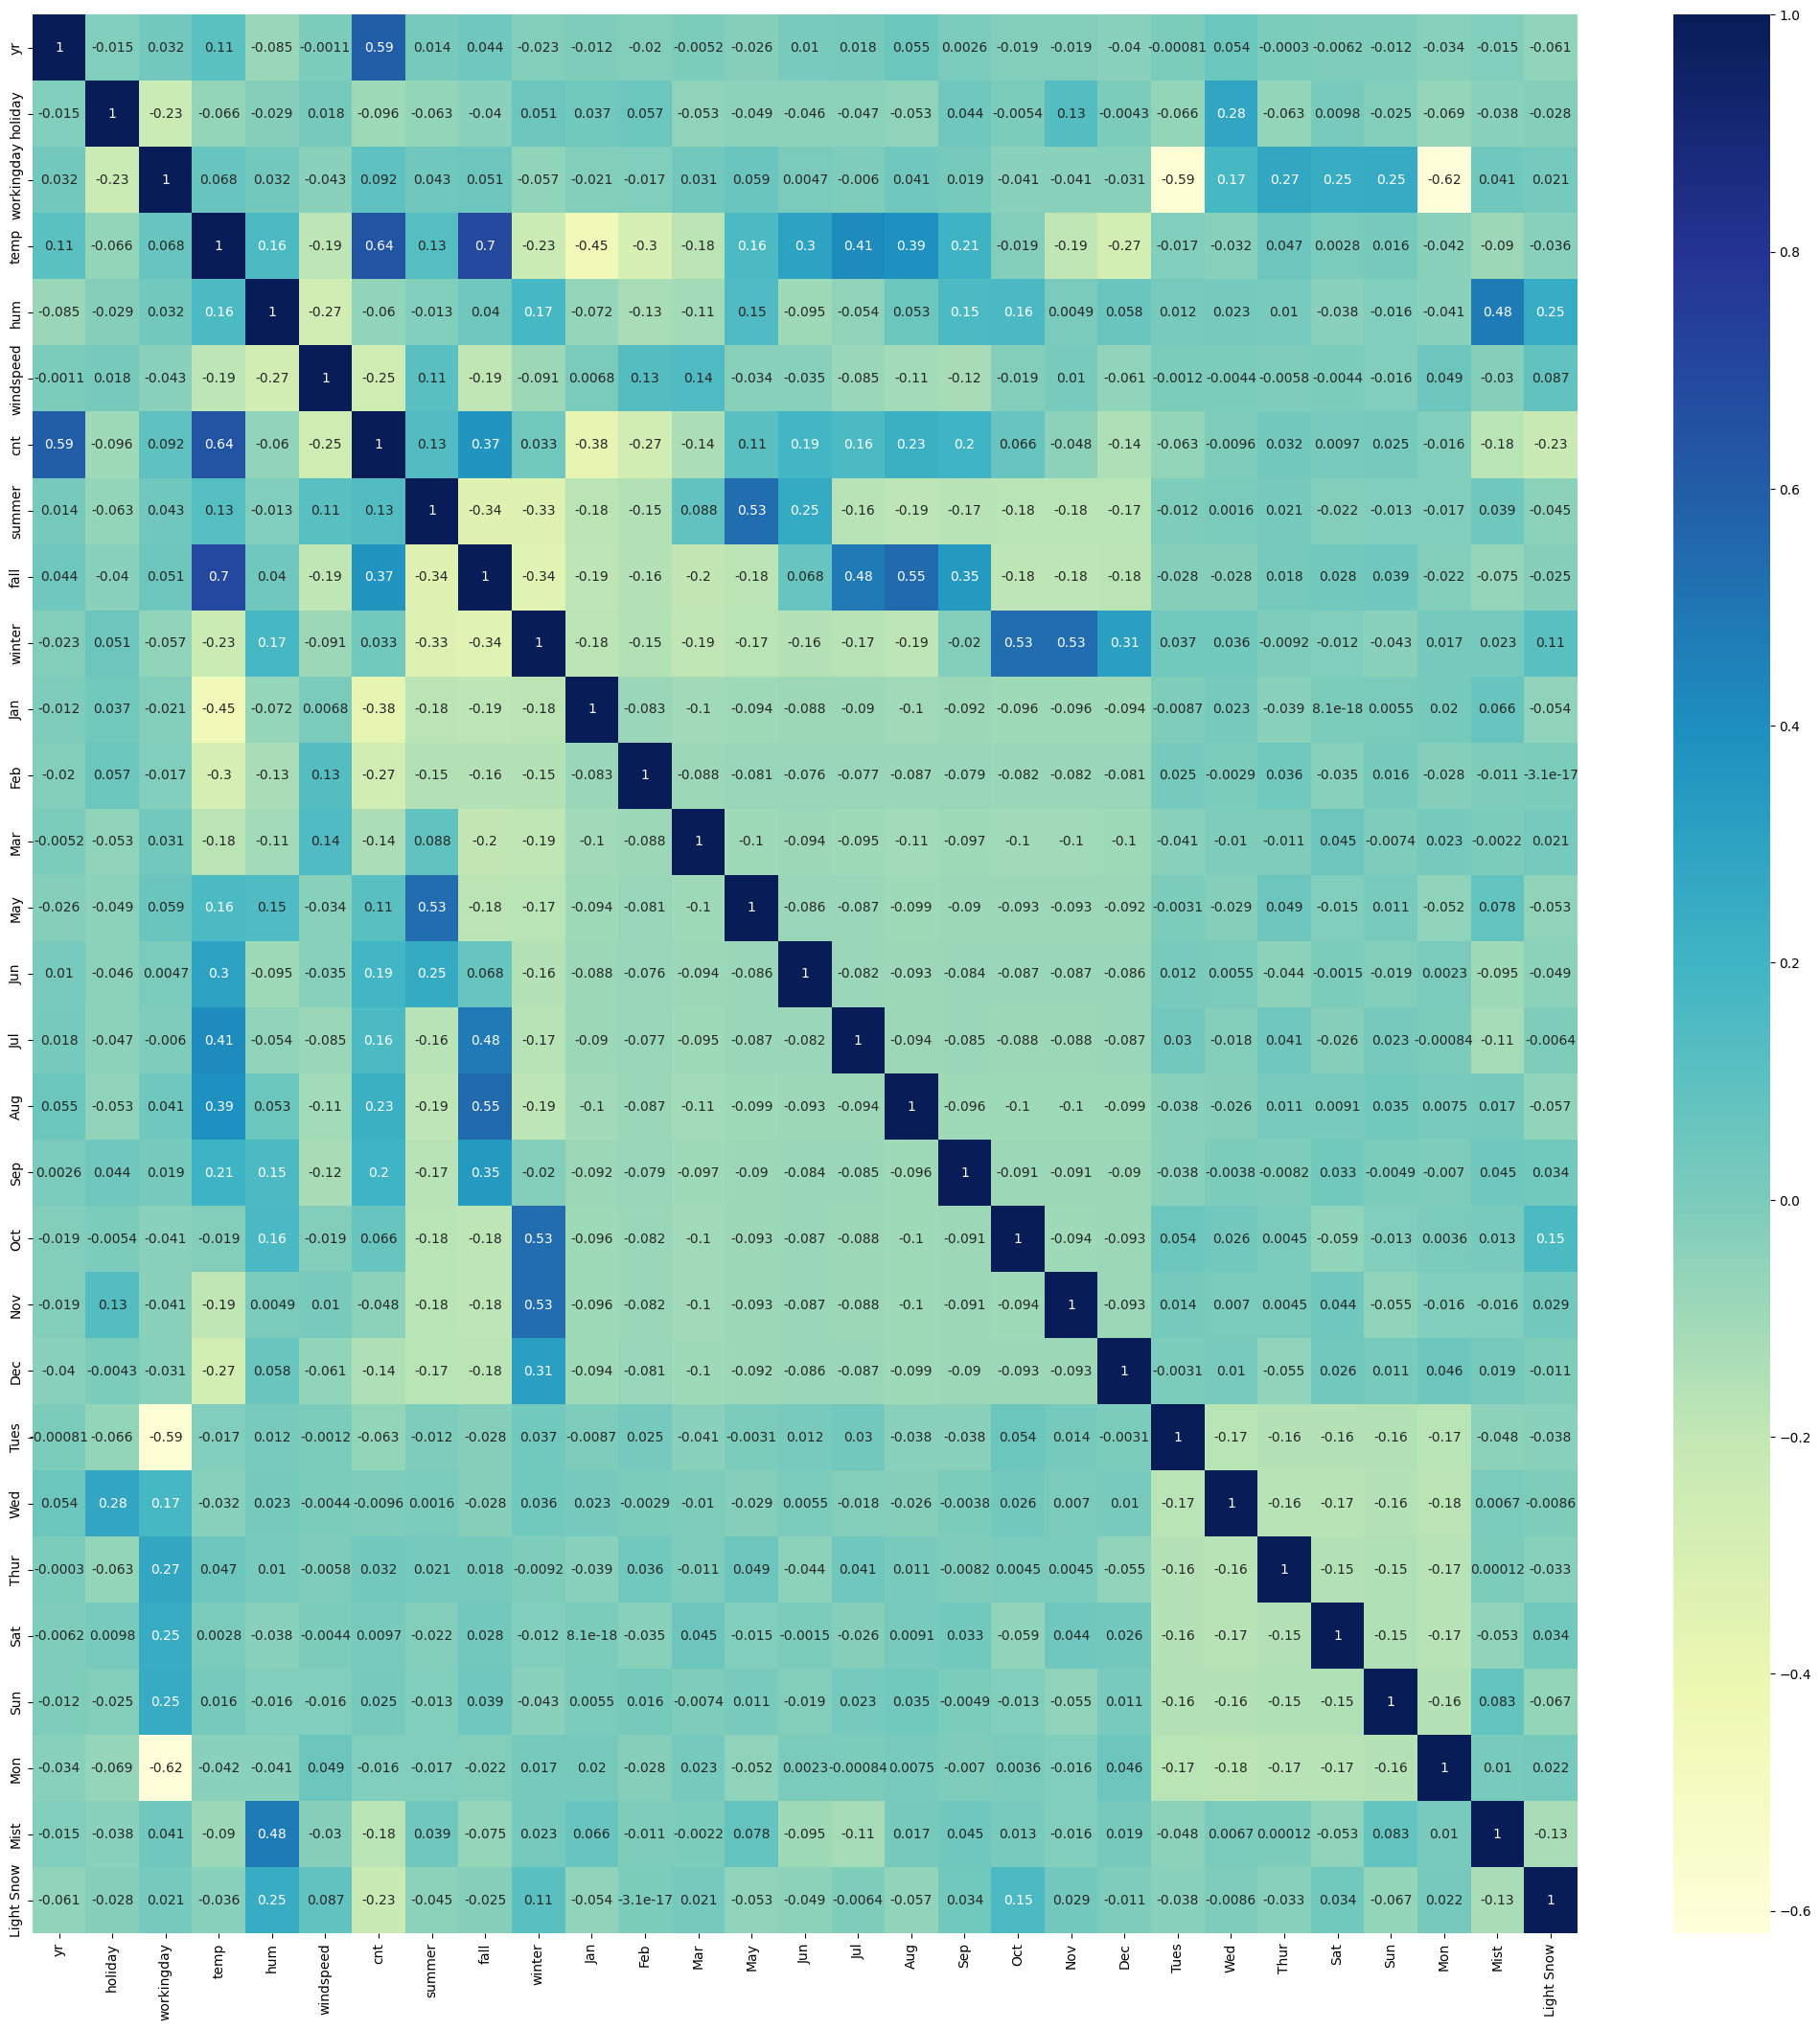

In [67]:
# Verifiquemos los coeficientes de correlación para ver qué variables están altamente correlacionadas creando un mapa de calor

plt.figure(figsize = (26, 26))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Aquí vemos que 'temp' está más correlacionado con 'cnt' seguido de 'yr'
#### Veamos un gráfico de pares de 'temp' vs 'cnt' y 'yr' vs 'cnt'

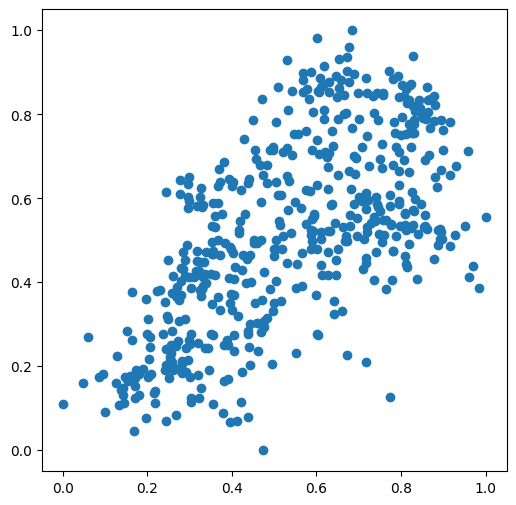

In [68]:
plt.figure(figsize=[6,6])
plt.scatter(bikes_train.temp,bikes_train.cnt)
plt.show()

### Dividir en conjuntos X e Y para la construcción del modelo

In [69]:
y_train=bikes_train.pop('cnt')
X_train=bikes_train

## Construyendo un modelo lineal
Necesitamos construir un modelo para ajustar una línea de regresión a través de los datos de entrenamiento. Dado que tenemos 28 variables independientes, usaremos el enfoque automatizado para la selección de características. Esta vez, usaremos la función LinearRegression de SciKit Learn por su compatibilidad con RFE (que es una utilidad de sklearn)

###  RFE

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
#Ejecutando RFE con número de salida de variable igual a 18
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select = 5)
rfe=rfe.fit(X_train,y_train)

In [72]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 3),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 5),
 ('windspeed', False, 4),
 ('summer', False, 8),
 ('fall', False, 11),
 ('winter', False, 6),
 ('Jan', False, 12),
 ('Feb', False, 15),
 ('Mar', False, 24),
 ('May', False, 16),
 ('Jun', False, 20),
 ('Jul', False, 10),
 ('Aug', False, 17),
 ('Sep', False, 7),
 ('Oct', False, 21),
 ('Nov', False, 14),
 ('Dec', False, 13),
 ('Tues', True, 1),
 ('Wed', False, 23),
 ('Thur', False, 19),
 ('Sat', False, 22),
 ('Sun', False, 18),
 ('Mon', True, 1),
 ('Mist', False, 9),
 ('Light Snow', False, 2)]

In [73]:
col=X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'Tues', 'Mon'], dtype='object')

### Modelo de construcción usando statsmodel, para las estadísticas detalladas

In [74]:
X_train_rfe=X_train[col]

In [75]:
#construir un modelo lineal con todas las columnas en el X_train_rfe
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_lm).fit()
lr.params

const         0.119948
holiday      -0.021928
workingday    0.060087
temp          0.635057
Tues          0.023659
Mon           0.058129
dtype: float64

In [76]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     91.47
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.86e-58
Time:                        18:06:12   Log-Likelihood:                 177.47
No. Observations:                 510   AIC:                            -344.9
Df Residuals:                     505   BIC:                            -323.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1199      0.018      6.760      0.0

Aquí vemos que las variables tienen valores de p muy bajos

#### Comprobando VIF

In [77]:
# Verifique los valores VIF de las variables de características.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Cree un marco de datos que contendrá los nombres de todas las variables de características y sus respectivos VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,5.02
4,Mon,1.81
3,Tues,1.79
0,holiday,1.10
2,temp,1.01


Por lo general, queremos un VIF inferior a 5.

### Eliminando la variable que es insignificante y actualizando el modelo

In [79]:
X = X_train_rfe.drop('Jan', axis=1)

KeyError: "['Jan'] not found in axis"

In [ ]:
#Building a second model with lesser no of features
X_train_lm=sm.add_constant(X)
lr_1=sm.OLS(y_train,X_train_lm).fit()
lr_1.params

const         0.161590
yr            0.229758
holiday      -0.024509
workingday    0.073324
temp          0.505455
hum          -0.155749
windspeed    -0.180068
summer        0.111508
fall          0.065047
winter        0.175768
Jul          -0.054958
Sep           0.075542
Nov          -0.035898
Dec          -0.029159
Tues          0.029423
Mon           0.083353
Mist         -0.059317
Light Snow   -0.251989
dtype: float64

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          1.86e-190
Time:                        22:44:27   Log-Likelihood:                 520.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -934.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1616      0.022      7.399      0.0

Aquí vemos que los valores p son muy bajos para todas las variables.<br>Por lo tanto, podemos considerarlos significativos.<br>Examinemos los valores VIF nuevamente

#### Comprobando VIF

In [ ]:
# Calcule nuevamente los VIF para el nuevo modelo

# Cree un marco de datos que contendrá los nombres de todas las variables de características y sus respectivos VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,31.40
14,Mon,7.78
13,Tues,7.64
7,fall,5.52
3,temp,3.96
8,winter,2.90
6,summer,2.60
1,holiday,2.16
4,hum,1.93
11,Nov,1.73


### Dropping the variable which has high VIF value and updating the model

In [ ]:
X = X.drop('hum', axis=1)

In [ ]:
#Building a third model after dropping 'hum'
X_train_lm=sm.add_constant(X)
lr_2=sm.OLS(y_train,X_train_lm).fit()
lr_2.params

const         0.093216
yr            0.233525
holiday      -0.042079
workingday    0.056790
temp          0.468287
windspeed    -0.149991
summer        0.115170
fall          0.075192
winter        0.172421
Jul          -0.050126
Sep           0.069247
Nov          -0.035959
Dec          -0.034975
Tues          0.009835
Mon           0.068670
Mist         -0.084428
Light Snow   -0.295531
dtype: float64

In [ ]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.6
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          6.61e-188
Time:                        18:48:13   Log-Likelihood:                 511.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     494   BIC:                            -923.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0932      0.015      6.369      0.0

Here we see that all the remaining variables have low p values and are still significant

#### Checking VIF

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,13.17
6,fall,5.44
13,Mon,3.78
3,temp,3.70
12,Tues,3.50
7,winter,2.89
5,summer,2.59
10,Nov,1.73
8,Jul,1.48
1,holiday,1.46


Here we see that after dropping 'hum' the VIF value for 'temp' has gone down from 16.97 to 6.97.<br> This implies that a lot of multicollinearity can be attributed to 'hum'<br>Among the remaining variables 'Mon' has the least correlation coeff with the target variable 'cnt'(-0.016).<br> Hence let us drop 'Mon', rebuild the model and examine

### Dropping the variable which has low correlation coeffiecient with 'cnt' and updating the model

In [ ]:
X = X.drop('Mon', axis=1)

In [ ]:
#Building a fourth model after droppingg 'Mon'
X_train_lm=sm.add_constant(X)
lr_3=sm.OLS(y_train,X_train_lm).fit()
lr_3.params

const         0.161886
yr            0.233525
holiday      -0.110749
workingday   -0.011880
temp          0.468287
windspeed    -0.149991
summer        0.115170
fall          0.075192
winter        0.172421
Jul          -0.050126
Sep           0.069247
Nov          -0.035959
Dec          -0.034975
Tues         -0.058835
Mist         -0.084428
Light Snow   -0.295531
dtype: float64

In [ ]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.6
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          6.61e-188
Time:                        22:45:28   Log-Likelihood:                 511.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     494   BIC:                            -923.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1619      0.020      8.206      0.0

Aquí vemos que 'workingday' tiene un valor p alto (0,075)<br>Por lo tanto, con el modelo actual, 'workingday' es insignificante y deberíamos eliminarlo

#### Comprobando VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,17.34
6,fall,7.10
2,workingday,4.25
7,winter,3.85
4,windspeed,3.64
5,summer,3.40
0,yr,2.04
10,Nov,1.86
12,Tues,1.67
8,Jul,1.60


### Eliminando la variable que es insignificante y actualizando el modelo

In [ ]:
X = X.drop('workingday', axis=1)

In [ ]:
#Building a fifth model by dropping 'working day'
X_train_lm=sm.add_constant(X)
lr_4=sm.OLS(y_train,X_train_lm).fit()
lr_4.params

const         0.152275
yr            0.233269
holiday      -0.101141
temp          0.467472
windspeed    -0.148691
summer        0.115094
fall          0.075244
winter        0.172707
Jul          -0.049726
Sep           0.069321
Nov          -0.036307
Dec          -0.034572
Tues         -0.049193
Mist         -0.084450
Light Snow   -0.295486
dtype: float64

In [ ]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          8.16e-189
Time:                        22:45:54   Log-Likelihood:                 511.05
No. Observations:                 510   AIC:                            -992.1
Df Residuals:                     495   BIC:                            -928.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1523      0.017      8.708      0.0

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.97
5,fall,7.02
6,winter,3.85
3,windspeed,3.40
4,summer,3.39
0,yr,2.02
9,Nov,1.84
7,Jul,1.60
12,Mist,1.49
8,Sep,1.43


Aquí vemos que todas las variables tienen un VIF inferior a 5<br>Solo 'temp' y 'fall' tiene un valor de VIF mayor de 5<br>Pero 'temp' está altamente correlacionado con 'cnt'.<br>Entre los restantes variables 'verano' tiene el coeficiente de correlación más bajo.<br> Por lo tanto, eliminemos 'summer' y reconstruyamos el modelo

### Eliminando la variable 'summer' y actualizando el modelo

In [ ]:
X = X.drop('summer', axis=1)

In [ ]:
#Building a sixth model with lesser no of features
X_train_lm=sm.add_constant(X)
lr_5=sm.OLS(y_train,X_train_lm).fit()
lr_5.params

const         0.137114
yr            0.230321
holiday      -0.113556
temp          0.632454
windspeed    -0.148636
fall         -0.038382
winter        0.107063
Jul          -0.062198
Sep           0.073061
Nov          -0.019452
Dec          -0.028715
Tues         -0.049811
Mist         -0.080530
Light Snow   -0.289469
dtype: float64

In [ ]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.2
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          7.74e-178
Time:                        22:46:02   Log-Likelihood:                 482.18
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     496   BIC:                            -877.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1371      0.018      7.464      0.0

Aquí vemos que todos los valores p son muy bajos.<br>Veamos los valores VIF

#### Comprobando VIF

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.17
4,fall,3.64
3,windspeed,3.38
5,winter,2.70
0,yr,2.02
8,Nov,1.82
6,Jul,1.59
11,Mist,1.49
7,Sep,1.43
9,Dec,1.40


los VIF y los valores de p están dentro de un rango aceptable. Así que seguimos adelante y hacemos nuestras predicciones usando solo el modelo lr_5.

##### El R-cuadrado ajustado para los datos del tren es 0,825

## Paso 7: Análisis residual de los datos del tren

Entonces, ahora para verificar si los términos de error también se distribuyen normalmente (que es, de hecho, uno de los principales supuestos de la regresión lineal), tracemos el histograma de los términos de error y veamos cómo se ve.

In [ ]:
y_train_pred = lr_5.predict(X_train_lm)

In [ ]:
y_train.shape
y_train_pred.shape
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'fall', 'winter', 'Jul',
       'Sep', 'Nov', 'Dec', 'Tues', 'Mist', 'Light Snow'],
      dtype='object')

Text(0.5, 0, 'Errors')

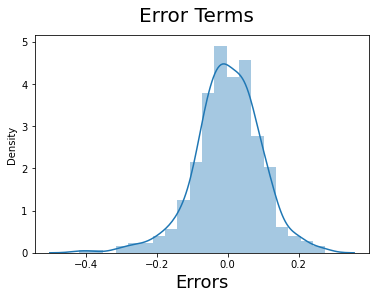

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Vemos que los términos de error se distribuyen normalmente con media centrada alrededor de cero

## Paso 8: Hacer predicciones usando el modelo final
Ahora que ajustamos el modelo y verificamos la normalidad de los términos de error, es hora de seguir adelante y hacer predicciones usando el final, es decir, lr_5.


#### Aplicar el escalado en los conjuntos de prueba

In [ ]:
num_vars=['temp','hum','windspeed','cnt']
bikes_test[num_vars]=scaler.transform(bikes_test[num_vars])

In [ ]:
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,Jan,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tues,Wed,Thur,Sat,Sun,Mon,Mist,Light Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.077626,0.100457,0.054795,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.146119,0.127854,0.164384,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.268194,0.301297,0.228100,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.354034,0.334692,0.371472,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividiendo en X_test y y_test

In [ ]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [ ]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Jan,Feb,Mar,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tues,Wed,Thur,Sat,Sun,Mon,Mist,Light Snow
184,0,1,0,0.831783,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
col=X_test.columns[rfe.support_]
X_test_rfe=X_test[col]
X_test_rfe.head()
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'Jan', 'Jul', 'Sep', 'Nov', 'Dec', 'Tues', 'Mon',
       'Mist', 'Light Snow'],
      dtype='object')


In [ ]:
# Agregar variable constante al marco de datos de prueba
X_test_m5 = sm.add_constant(X_test_rfe)

In [ ]:
X_test_m5 = X_test_m5.drop(["hum", "Jan","workingday","Mon","summer"], axis = 1)

In [ ]:
# Haciendo predicciones usando el modelo lr_5

y_test_pred= lr_5.predict(X_test_m5)

Text(0, 0.5, 'y_pred')

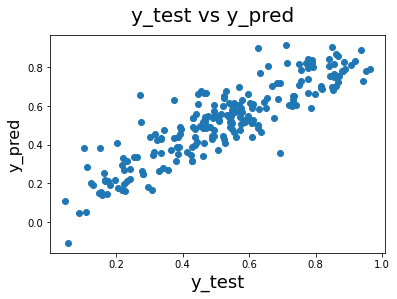

In [ ]:
# Plotting y_test y y_pred para comprender la propagación

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#evaluar
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7808502765983798

##### R-Square ajustado para el conjunto de prueba es 0.80

Podemos ver que la ecuación de nuestra recta mejor ajustada es:

$ cnt = 0.389  \times  temp + 0.235  \times  yr + 0.047 \times winter + 0.056 \times Sep - 0.092 \times holiday - 0.151 \times windspeed - 0.145 \times spring - 0.073 \times Jul - 0.27 \times Light Snow - 0.082 \times Mist  $

## Analysis

###### De la ecuación anterior vemos que las siguientes variables son significativas para predecir la demanda:
1.temp: la temperatura tiene el coeficiente de correlación más alto y con cada aumento de la unidad en la temperatura, la variable objetivo aumenta en 0,385 (siempre que las otras variables sean constantes)<br>
2.yr :Esta variable también tiene un coeficiente de correlación positivo bastante alto con la variable objetivo<br>
3.winter: esta variable tiene un coeficiente de correlación positivo con la variable objetivo<br>
4.Sep :Esta variable tiene un coeficiente de correlación positivo con la variable objetivo<br>
5.holiday: esta variable tiene un coeficiente de correlación negativo con la variable objetivo<br>
6.windspeed del viento: esta variable tiene un coeficiente de correlación negativo con la variable objetivo<br>
7.spring:Esta variable tiene un coeficiente de correlación negativo con la variable objetivo<br>
8.Jul:Esta variable tiene un coeficiente de correlación negativo con la variable objetivo<br>
9.LightSnow: esta variable tiene un coeficiente de correlación negativo con la variable de destino<br>
10. Mist: esta variable tiene un coeficiente de correlación negativo con la variable objetivo<br>